In [ ]:
#https://github.com/jim-easterbrook/python-gphoto2/tree/master/examples

In [1]:
!ps aux | grep gphoto

mbu         1106  0.0  0.0   6892  3288 pts/1    Ss+  19:58   0:00 /bin/bash -c ps aux | grep gphoto
mbu         1108  0.0  0.0   6432   720 pts/1    S+   19:58   0:00 grep gphoto


In [ ]:
#!systemctl stop gvfs-gphoto2-volume-monitor
#jupyter-notebook --ip IP --port PORT


==== AUTHENTICATING FOR org.freedesktop.systemd1.manage-units ===
Authentication is required to stop 'gvfs-gphoto2-volume-monitor.service'.
Authenticating as: mbu
Password: 

In [5]:
!pkill -f gphoto2

In [4]:
!gphoto2 --auto-detect

Modell                         Port                                            
----------------------------------------------------------
Canon EOS 1000D                usb:002,002     


In [6]:
!lsusb

Bus 003 Device 001: ID 1d6b:0002 Linux Foundation 2.0 root hub
Bus 007 Device 001: ID 1d6b:0001 Linux Foundation 1.1 root hub
Bus 006 Device 001: ID 1d6b:0001 Linux Foundation 1.1 root hub
Bus 002 Device 002: ID 04a9:317b Canon, Inc. Canon Digital Camera
Bus 002 Device 001: ID 1d6b:0002 Linux Foundation 2.0 root hub
Bus 005 Device 002: ID 0bf8:1006 Fujitsu Siemens Computers SmartCard Reader 2A
Bus 005 Device 001: ID 1d6b:0001 Linux Foundation 1.1 root hub
Bus 001 Device 001: ID 1d6b:0002 Linux Foundation 2.0 root hub
Bus 004 Device 001: ID 1d6b:0001 Linux Foundation 1.1 root hub


In [7]:
import gphoto2 as gp

In [8]:
camera = gp.Camera()
#camera.init()
camera.wait_for_event(100)
camera.get_config()
text = camera.get_summary()
print('Summary')
print('=======')
print(str(text))
camera.exit()

Summary
Manufacturer: Canon Inc.
Model: Canon EOS 1000D
  Version: 3-1.0.7
  Serial Number: c8f59bba185f48739b3a6fa086c2abb3
Vendor Extension ID: 0xb (2.0)
Vendor Extension Description: 

Capture Formats: JPEG
Display Formats: Association/Directory, Script, DPOF, MS AVI, MS Wave, JPEG, CRW, Unknown(b103), Unknown(bf02), Defined Type

Device Capabilities:
	File Download, File Deletion, File Upload
	No Image Capture, No Open Capture, Canon EOS Capture

Storage Devices Summary:

Device Property Summary:
Property 0xd402:(read only) (type=0xffff) 'Canon EOS 1000D'
Property 0xd407:(read only) (type=0x6) 1
Property 0xd406:(readwrite) (type=0xffff) 'Unknown Initiator'



In [32]:
#camera = gp.Camera()
#camera.init()
camera = gp.check_result(gp.gp_camera_new())
gp.check_result(gp.gp_camera_init(camera))
text = gp.check_result(gp.gp_camera_get_summary(camera))
print('Summary')
print('=======')
print(text.text)
#gp.check_result(gp.gp_camera_exit(camera))

Summary
Manufacturer: Canon Inc.
Model: Canon EOS 1000D
  Version: 3-1.0.7
  Serial Number: c8f59bba185f48739b3a6fa086c2abb3
Vendor Extension ID: 0xb (2.0)
Vendor Extension Description: 

Capture Formats: JPEG
Display Formats: Association/Directory, Script, DPOF, MS AVI, MS Wave, JPEG, CRW, Unknown(b103), Unknown(bf02), Defined Type

Device Capabilities:
	File Download, File Deletion, File Upload
	No Image Capture, No Open Capture, Canon EOS Capture

Storage Devices Summary:

Device Property Summary:
Property 0xd402:(read only) (type=0xffff) 'Canon EOS 1000D'
Property 0xd407:(read only) (type=0x6) 1
Property 0xd406:(readwrite) (type=0xffff) 'Unknown Initiator'



In [33]:
camera_file = gp.check_result(gp.gp_camera_capture_preview(camera))
file_data = gp.check_result(gp.gp_file_get_data_and_size(camera_file))

In [34]:
data = memoryview(file_data)

In [35]:
print(type(data), len(data))

<class 'memoryview'> 120890


In [36]:
print(data[:10].tolist())

[255, 216, 255, 196, 1, 162, 0, 0, 1, 5]


In [37]:
gp.check_result(gp.gp_camera_exit(camera))

0

In [38]:
#import matplotlib.pyplot as plt
from PIL import Image
import io

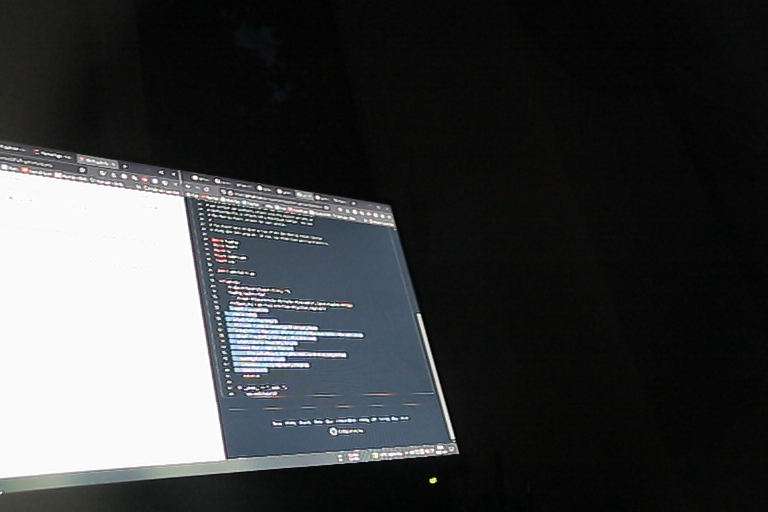

In [39]:
img = io.BytesIO(file_data)
#plt.figure(figsize=(6, 4), dpi=150)
#plt.imshow(img)

image = Image.open(img)
image.show()

In [40]:
#capture image
camera = gp.Camera()
camera.init()
print('Capturing image')
file_path = camera.capture(gp.GP_CAPTURE_IMAGE)
print('Camera file path: {0}/{1}'.format(file_path.folder, file_path.name))
target = os.path.join('/tmp', file_path.name)
#print('Copying image to', target)
#camera_file = camera.file_get(file_path.folder, file_path.name, gp.GP_FILE_TYPE_NORMAL)
#camera_file.save(target)
#subprocess.call(['xdg-open', target])
camera.exit()

Capturing image
Camera file path: //capt0000.jpg


NameError: name 'os' is not defined

In [41]:
camera.exit()